In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print("Features:", X.shape)
print("Target classes:", y.unique())  # 0 = malignant, 1 = benign

Features: (569, 30)
Target classes: [0 1]


In [11]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='target')

# Save raw dataset
X.to_csv('../data/breast_cancer_features.csv', index=False)
y.to_csv('../data/breast_cancer_target.csv', index=False)

# Combine features + target for full dataset
full_data = pd.concat([X, y], axis=1)
full_data.to_csv('../data/breast_cancer_full.csv', index=False)


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (455, 30)
Test size: (114, 30)


## Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.956140350877193


## Support Vector Machine


In [7]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))

SVM Accuracy: 0.956140350877193


## Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.9473684210526315


## Random Forest (Best Model)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.9649122807017544


In [8]:
import pickle

# Save the model
with open('../models/random_forest.pkl', 'wb') as f:
    pickle.dump(rf, f)

print("Model saved to models/random_forest.pkl")

Model saved to models/random_forest.pkl


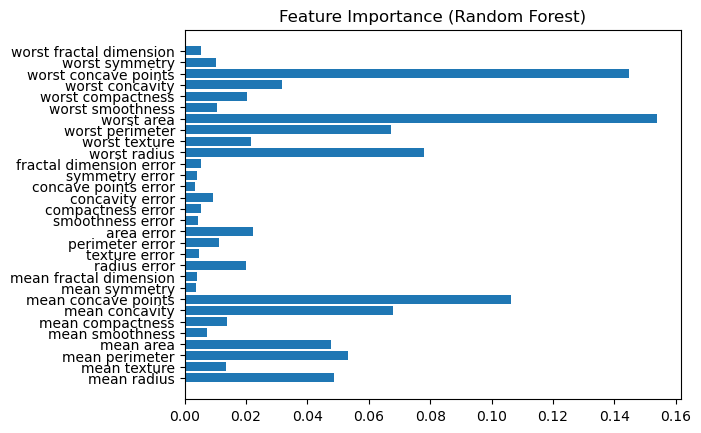

In [9]:
import matplotlib.pyplot as plt

# Plot feature importance for Random Forest
importances = rf.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation for Random Forest
scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Mean Accuracy: 0.9560937742586555
